In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

from utils.dataset import load_dataset, split_data

from models.model_selection import ModelSelector

%matplotlib inline

In [ ]:
# Load dataset and describe it

dataset_path = 'dataset/hcvdat0.csv'


hcv_df = load_dataset(dataset_path)
hcv_df = hcv_df[hcv_df.columns[1:]]  # remove first 'Unnamed' column
hcv_df.head(5)

print(f'Number of different categories: {hcv_df["Category"].value_counts()}')
# describe DataFrame
hcv_df.describe()

# Identify non-numeric columns and their unique values
for column in ['Category', 'Sex']:
    unique_values = hcv_df[column].unique()
    print(f'Unique values in column {column}:')
    print(unique_values)
    print('\n')

In [ ]:
# Transforming string values to numeric (Category, Sex) and filling nulls
category_mapping = {
    '0=Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3,
    '0s=suspect Blood Donor': 4
}

sex_mapping = {
    'm': 0,
    'f': 1
}

replacement_dict = {
    'Category': category_mapping,
    'Sex': sex_mapping
}

hcv_df.replace(replacement_dict, inplace=True)
hcv_df = hcv_df.fillna(method='ffill')
hcv_df.head(5)

In [ ]:
# creating an AutoViz instance
AV = AutoViz_Class()

# generating data visualization automatically
AV.AutoViz(
    filename='',
    sep=',',
    depVar='',
    dfte=hcv_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=10000,
    max_cols_analyzed=30
)

In [ ]:
# Plot correlation between columns (features)

sns.heatmap(hcv_df.corr(), annot = True, annot_kws={'fontsize': 8})

In [ ]:
# Split train and test data
y_label = 'Category'
X_train, X_test, y_train, y_test = split_data(hcv_df, y_label)

In [ ]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

In [ ]:
# Initialize models with hyperparams v1
print('Training models with v1 hyperparameters...')
hyperparams_v1: dict = {
        'logistic': {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.005},
        'n_bayes': {'alpha': 1.0},
        'rand_forest': {'n_estimators': 100, 'max_depth': 10, 'criterion': 'log_loss'}
    }

ms_1 = ModelSelector(hyperparams=hyperparams_v1)

# Select Logistic model

logistic_model = ms_1.select_model('logistic')
logistic_model.fit(X_train, y_train)

# Evaluate logistic model
print('Logistic Regression model:')
print('Training score:', logistic_model.score(X_train, y_train))
print('Test score:', logistic_model.score(X_test, y_test))

# Select Naive Bayes model
nb_model = ms_1.select_model('n_bayes')
nb_model.fit(X_train, y_train)

print('Naive Bayes model')
print('Training score:', nb_model.score(X_train, y_train))
print('Test score:', nb_model.score(X_test, y_test))

# Select random forest model
rf_model = ms_1.select_model('rand_forest')
rf_model.fit(X_train, y_train)

print('Random Forest model')
print('Training score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

print('Training and evaluation for v1 hyperparams done.')


In [ ]:
# Initialize models with hyperparams v2
print('Training models with v2 hyperparameters...')
hyperparams_v2: dict = {
        'logistic': {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01},
        'n_bayes': {'alpha': 0.75},
        'rand_forest': {'n_estimators': 100, 'max_depth': 20, 'criterion': 'log_loss'}
    }

ms_2 = ModelSelector(hyperparams=hyperparams_v2)

# Select Logistic model

logistic_model = ms_2.select_model('logistic')
logistic_model.fit(X_train, y_train)

# Evaluate logistic model
print('Logistic Regression model:')
print('Training score:', logistic_model.score(X_train, y_train))
print('Test score:', logistic_model.score(X_test, y_test))

# Select Naive Bayes model
nb_model = ms_2.select_model('n_bayes')
nb_model.fit(X_train, y_train)

print('Naive Bayes model')
print('Training score:', nb_model.score(X_train, y_train))
print('Test score:', nb_model.score(X_test, y_test))

# Select random forest model
rf_model = ms_2.select_model('rand_forest')
rf_model.fit(X_train, y_train)

print('Random Forest model')
print('Training score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

print('Training and evaluation for v2 hyperparams done.')

In [ ]:
# Initialize models with hyperparams v3
print('Training models with v3 hyperparameters...')
hyperparams_v3: dict = {
        'logistic': {'max_iter': 50, 'solver': 'saga', 'penalty': 'l1', 'C': 0.01},
        'n_bayes': {'alpha': 0.4},
        'rand_forest': {'n_estimators': 100, 'max_depth': 15, 'criterion': 'log_loss'}
    }

ms_3 = ModelSelector(hyperparams=hyperparams_v3)

# Select Logistic model

logistic_model = ms_3.select_model('logistic')
logistic_model.fit(X_train, y_train)

# Evaluate logistic model
print('Logistic Regression model:')
print('Training score:', logistic_model.score(X_train, y_train))
print('Test score:', logistic_model.score(X_test, y_test))

# Select Naive Bayes model
nb_model = ms_3.select_model('n_bayes')
nb_model.fit(X_train, y_train)

print('Naive Bayes model')
print('Training score:', nb_model.score(X_train, y_train))
print('Test score:', nb_model.score(X_test, y_test))

# Select random forest model
rf_model = ms_3.select_model('rand_forest')
rf_model.fit(X_train, y_train)

print('Random Forest model')
print('Training score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

print('Training and evaluation for v2 hyperparams done.')

In [ ]:
# Plot bias-variance tradeoff for each mode
logistic_hyperparams = [
    {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.00005},
    {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.0005},
    {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.005},
    {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.05},
    {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.5},
]

train_errors = []
test_errors = []


In [ ]:
for idx, item in enumerate(logistic_hyperparams):
    selector = ModelSelector(
        hyperparams={
            'logistic': logistic_hyperparams[idx]
        }
    )
    
    model = selector.select_model('logistic')
    
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    
    # Calculate log loss (negative log likelihood)
    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))
    
    print(f'Training score:', model.score(X_train, y_train), 'for C=', item['C'])
    print('Test score:', model.score(X_test, y_test), 'for C=', item['C'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


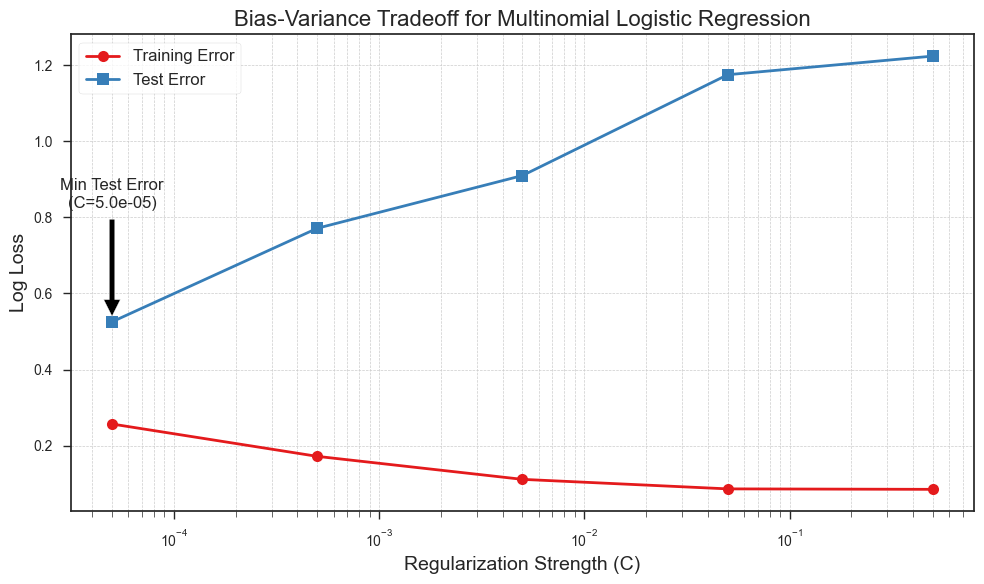

In [14]:
C_values = [0.00005, 0.0005, 0.005, 0.05, 0.5]
print(plt.style.available)

# Set style
plt.style.use('seaborn-v0_8-notebook')

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o', markersize=8, linewidth=2)
plt.plot(C_values, test_errors, label='Test Error', marker='s', markersize=8, linewidth=2)

# Set log scale for x-axis
plt.xscale('log')

# Titles and labels
plt.xlabel('Regularization Strength (C)', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Bias-Variance Tradeoff for Multinomial Logistic Regression', fontsize=16)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Annotate minimum test error point
min_test_error_idx = np.argmin(test_errors)
min_test_error = test_errors[min_test_error_idx]
min_C_value = C_values[min_test_error_idx]
plt.annotate(f'Min Test Error\n(C={min_C_value:.1e})',
             xy=(min_C_value, min_test_error),
             xytext=(min_C_value, min_test_error + 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             ha='center')

# Show plot
plt.tight_layout()
plt.show()